In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, f1_score
import numpy as np

from model_fit_predict import model_fit_predict

import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

## Supervised Learning Challenge

### Explore your data. Can you identify anything interest that is worth noting from the data?

#### Each row in the ‘data’ belongs to a ‘measurement’ and each column represents a ‘feature’. For each row in the ‘data’ you have a corresponding class label in ‘target’. You can consider the row-numbers as keys.

In [3]:
data = pd.read_csv('data/data.csv', sep=' ', header=None)
target = pd.read_csv('data/target.csv', sep=' ', header=None)

In [4]:
data.columns = ['_{}'.format(i) for i in data.columns]

In [5]:
target.columns = ['target']

In [6]:
scaler = StandardScaler()

In [7]:
data_scaled = pd.DataFrame(scaler.fit_transform(data))

In [8]:
data_scaled.columns = data.columns

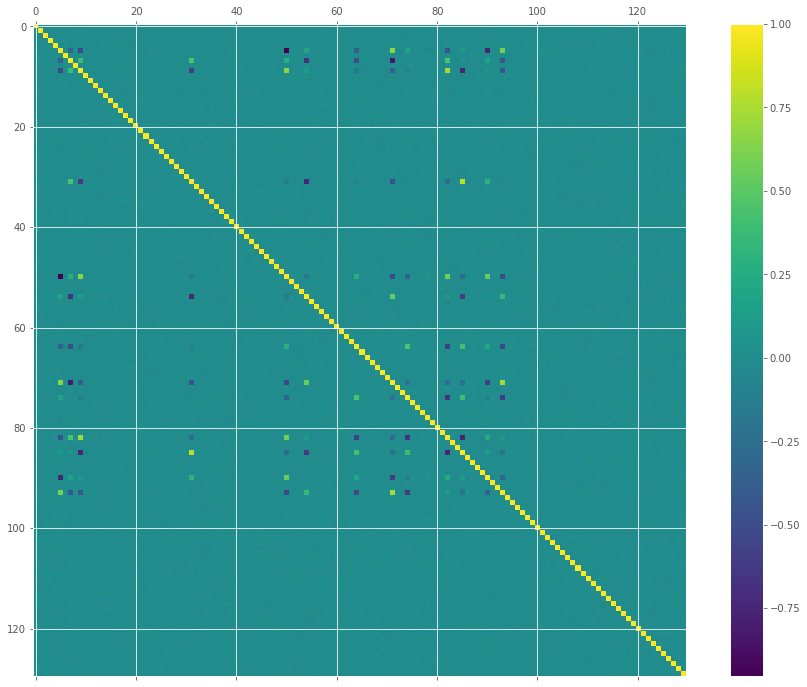

In [9]:
fig, ax = plt.subplots(figsize=(16, 12))
mat = ax.matshow(data_scaled.corr())
plt.colorbar(mat)

Features from ~ 96 through 129 can be eliminated

In [10]:
data_scaled = data_scaled.iloc[:, :96]

#### Split Data - Training / Validation / Final Test - 80/10/10

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size = 0.2)

In [12]:
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [13]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)

(8000, 96)
(1000, 96)
(1000, 96)


In [14]:
X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(data, target, test_size = 0.2)
X_val_non, X_test_non, y_val_non, y_test_non = train_test_split(X_test_non, y_test_non, test_size = 0.5)

---

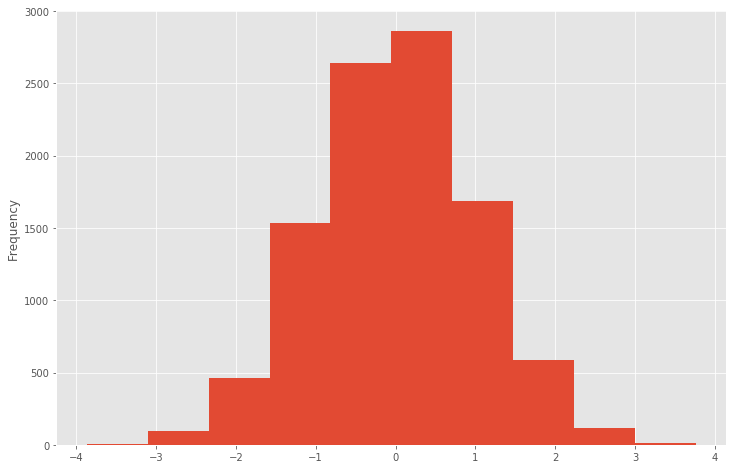

In [15]:
data_scaled._0.plot(kind='hist')
None

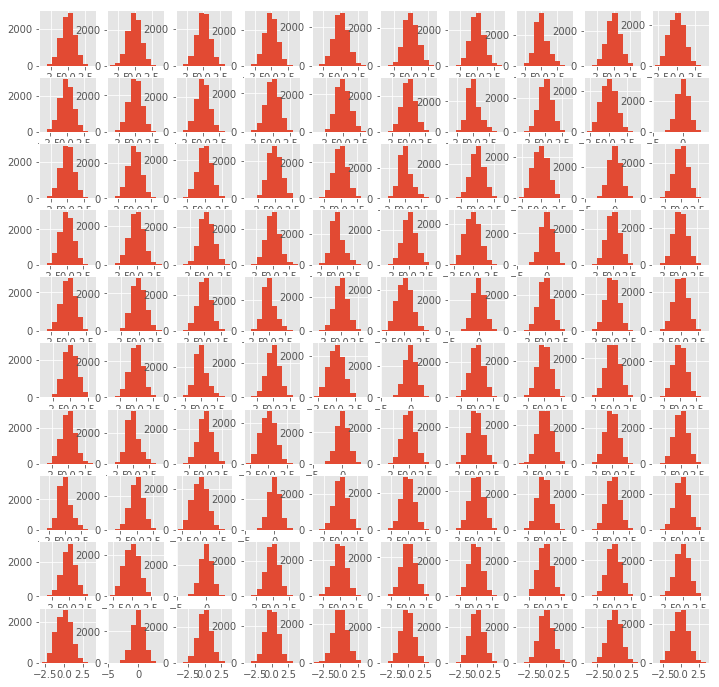

In [16]:
fig, axes = plt.subplots(10,10, figsize=(12,12))

for i, ax in enumerate(axes):
    for j, ax_ in enumerate(ax):
        if i+j < len(data_scaled.columns):
            ax_.hist(data_scaled['_{}'.format(i+j)].values)


---

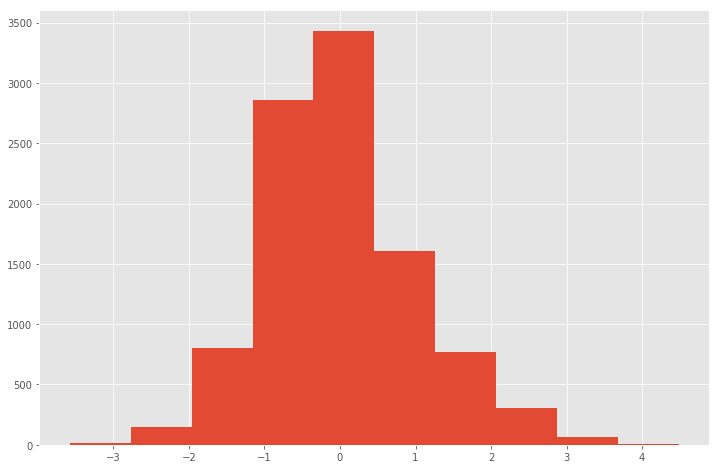

In [17]:
data_scaled._7.hist()

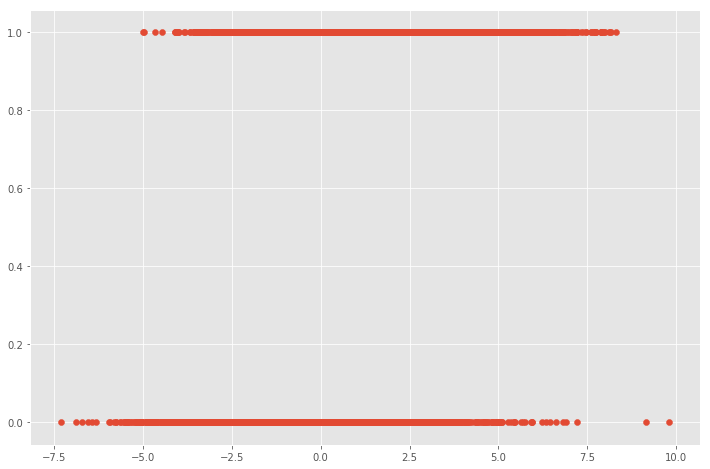

In [18]:
plt.scatter(data._7, target.target)

---

In [19]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [20]:
def print_scores(model, X_val_, y_val_):
    preds = model.predict(X_val_)
    print("ROC/AUC score: {:.2f}%".format(100*roc_auc_score(y_val_, preds)))
    print("Accuracy score: {:.2f}%".format(100*accuracy_score(y_val_, preds)))
    print("F1 score: {:.2f}%".format(100*f1_score(y_val_, preds)))

### Define a set of possible classifiers and show which one performs best. 
#### *Keep in mind the problem of overfitting.*

Support Vector Machine might work well with such a high feature space

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC() # kernel and gamma?

In [23]:
svc = model_fit_predict(SVC, X_train_non, X_val_non, y_train_non.target, y_val_non.target)

None
Number of mislabeled points out of 1000 points: 63


In [24]:
print_scores(svc, X_val_non, y_val_non)

ROC/AUC score: 93.70%
Accuracy score: 93.70%
F1 score: 93.78%


In [25]:
svc_alt = model_fit_predict(SVC, X_train_non, X_val_non, y_train_non.target, y_val_non.target, kernel='linear')

None
Number of mislabeled points out of 1000 points: 163


In [26]:
print_scores(svc_alt, X_val_non, y_val_non)

ROC/AUC score: 83.65%
Accuracy score: 83.70%
F1 score: 84.61%


---

In [27]:
from sklearn.linear_model import LogisticRegression as LogReg

In [28]:
model_fit_predict(LogReg, X_train, X_validate, y_train.target, y_validate.target)

None
Number of mislabeled points out of 1000 points: 151


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
from sklearn.linear_model import SGDClassifier as SGDC

In [30]:
sgdc = model_fit_predict(SGDC, X_train, X_validate, y_train.target, y_validate.target, 
                         loss='hinge', 
                         penalty='l2', 
                         alpha=0.05, 
                         max_iter=1000)

None
Number of mislabeled points out of 1000 points: 143


In [31]:
print_scores(sgdc, X_validate, y_validate)

ROC/AUC score: 85.67%
Accuracy score: 85.70%
F1 score: 86.37%


The distributions are quite similar - Maybe a neural network can pick out something special?

In [32]:
from sklearn.linear_model import Perceptron

In [33]:
perc = Perceptron(alpha = 0.001, max_iter=500)

In [34]:
perc.fit(X_train, y_train.target)

Perceptron(alpha=0.001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=500, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [35]:
mean_squared_error(y_validate, perc.predict(X_validate))

0.225

In [36]:
print_scores(perc, X_validate, y_validate)

ROC/AUC score: 77.50%
Accuracy score: 77.50%
F1 score: 77.74%


In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
mlp = model_fit_predict(MLPClassifier, X_train, X_validate, y_train.target, y_validate.target, 
                        alpha = 0.005, 
                        learning_rate='adaptive',
                        epsilon=1e-10)

None
Number of mislabeled points out of 1000 points: 100


In [39]:
print_scores(mlp, X_validate, y_validate.target)

ROC/AUC score: 90.00%
Accuracy score: 90.00%
F1 score: 90.10%


Maybe there isn't a linear relationship

In [40]:
from sklearn.tree import DecisionTreeClassifier as DC

In [41]:
dc = model_fit_predict(DC, X_train, X_validate, y_train.target, y_validate.target)

None
Number of mislabeled points out of 1000 points: 109


In [42]:
print_scores(dc, X_validate, y_validate)

ROC/AUC score: 89.10%
Accuracy score: 89.10%
F1 score: 89.22%


In [43]:
from sklearn.ensemble import RandomForestClassifier as RF

In [44]:
rf = model_fit_predict(RF, X_train, X_validate, y_train.target, y_validate.target)

None
Number of mislabeled points out of 1000 points: 69


In [45]:
mean_squared_error(y_validate, rf.predict(X_validate))

0.069

In [46]:
print_scores(rf, X_validate, y_validate)

ROC/AUC score: 93.11%
Accuracy score: 93.10%
F1 score: 92.97%


### Using feature selection try to reduce the number of features. In the dataset you have over 100 features. Find the good ones for your classifier.

In [47]:
from sklearn.decomposition import PCA

In [48]:
n = 1
ratio = 0
num_cols = len(data_scaled.columns)
while n < num_cols and ratio < .9:
    pca = PCA(n)
    pca.fit(X_train)
    ratio = np.sum(pca.explained_variance_ratio_)
    n += 1

print(ratio)

0.9039384829743353


In [49]:
pca

PCA(copy=True, iterated_power='auto', n_components=77, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
X_train_trans = pca.transform(X_train)

In [51]:
X_val_trans = pca.transform(X_validate)

In [52]:
model_fit_predict(SVC, X_train_trans, X_val_trans, y_train.target, y_validate.target)

None
Number of mislabeled points out of 1000 points: 126


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [54]:
lda = model_fit_predict(LDA, X_train, X_validate, y_train.target, y_validate.target)

None
Number of mislabeled points out of 1000 points: 145


C:\Users\Jeremy\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [55]:
lda_pred = lda.predict(X_validate)

In [56]:
f1_score(y_validate.target, lda_pred)

0.8633364750235627

---

In [57]:
from sklearn.feature_selection import SelectFromModel

In [58]:
selector = SelectFromModel(RF())

In [59]:
selector.fit(X_train, y_train.target)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [60]:
X_train_sel, X_val_sel = selector.transform(X_train), selector.transform(X_validate)

In [61]:
rf = model_fit_predict(RF, X_train_sel, X_val_sel , y_train.target, y_validate.target)

None
Number of mislabeled points out of 1000 points: 58


In [62]:
rf.score(X_val_sel, y_validate.target)

0.942

In [63]:
f1_score(y_validate.target, rf.predict(X_val_sel))

0.9416498993963783

In [64]:
from sklearn.ensemble import ExtraTreesClassifier as ExTree
ex_tree = ExTree()
ex_tree.fit(X_train, y_train.target)
fi = ex_tree.feature_importances_
fi = np.sort(fi)

In [65]:
ex_select = SelectFromModel(ex_tree, prefit=True, threshold=fi[-7])
ex_X_train = ex_select.transform(X_train)   
ex_X_val = ex_select.transform(X_validate)

In [66]:
ex_X_train.shape

(8000, 7)

In [67]:
rf_sel = model_fit_predict(RF, ex_X_train, ex_X_val, y_train.target, y_validate.target)

None
Number of mislabeled points out of 1000 points: 52


In [68]:
print_scores(rf_sel, ex_X_val, y_validate.target)

ROC/AUC score: 94.80%
Accuracy score: 94.80%
F1 score: 94.81%


In [69]:
mlp_sel = model_fit_predict(MLPClassifier, ex_X_train, ex_X_val, y_train.target, y_validate.target, 
                            alpha = 0.01, 
                            learning_rate='adaptive',
                            epsilon=1e-11)

None
Number of mislabeled points out of 1000 points: 46


In [70]:
print_scores(mlp_sel, ex_X_val, y_validate.target)

ROC/AUC score: 95.40%
Accuracy score: 95.40%
F1 score: 95.40%


In [71]:
svc_sel = model_fit_predict(SVC, ex_X_train, ex_X_val, y_train.target, y_validate.target)

None
Number of mislabeled points out of 1000 points: 47


In [72]:
print_scores(svc_sel, ex_X_val, y_validate.target)

ROC/AUC score: 95.30%
Accuracy score: 95.30%
F1 score: 95.30%


In [73]:
from sklearn.ensemble import AdaBoostClassifier as Ada

In [74]:
ada_sel = model_fit_predict(Ada, ex_X_train, ex_X_val, y_train.target, y_validate.target,
                            base_estimator=RF(n_estimators=20),
                            n_estimators=40)

print_scores(ada_sel, ex_X_val, y_validate.target)

None
Number of mislabeled points out of 1000 points: 49
ROC/AUC score: 95.10%
Accuracy score: 95.10%
F1 score: 95.10%


---

### There happen to be a lot of commonly missed indexes

In [137]:
pred_rf_sel = rf_sel.predict(ex_X_val)

In [138]:
missed_rf = X_validate[pred_rf_sel != y_validate.target]

In [75]:
pred_ada_sel = ada_sel.predict(ex_X_val)

In [85]:
missed_ada = X_validate[pred_ada_sel != y_validate.target]

In [82]:
pred_svc_sel = svc_sel.predict(ex_X_val)

In [83]:
missed_svc = X_validate[pred_svc_sel != y_validate.target]

In [141]:
rf_ada_svc_index = list(set(list(missed_svc.index) + list(missed_ada.index) + list(missed_rf.index)))
rf_ada_svc = X_validate.loc[rf_ada_svc_index, :]

In [143]:
len(rf_ada_svc_index)

56

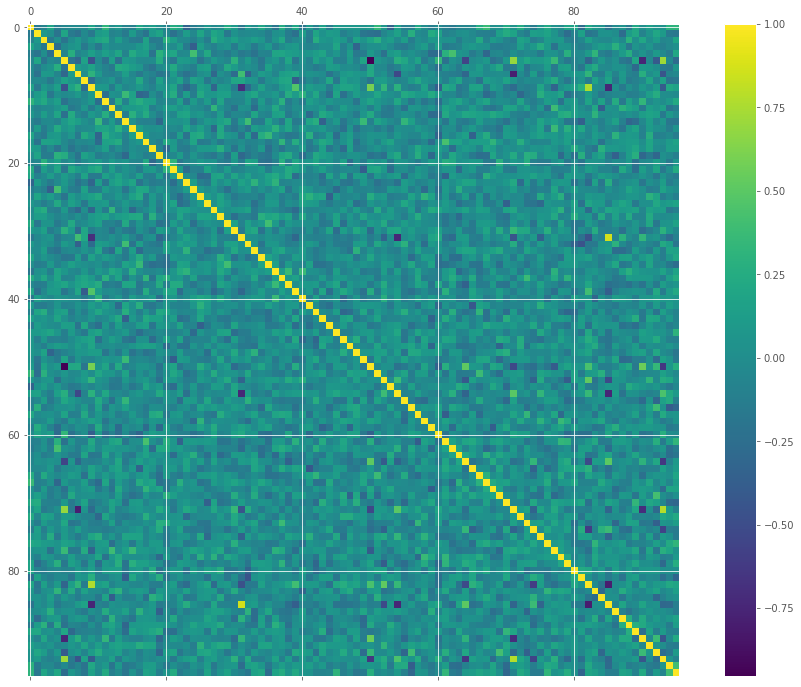

In [142]:
fig, ax = plt.subplots(figsize=(16,12))
rf_ada_svc_mat = ax.matshow(rf_ada_svc.corr())
plt.colorbar(mat)
None

---

### Around this time, the class starts talking about XGBoost, so curiousity sets in...

In [77]:
from xgboost import XGBClassifier as XGB

In [78]:
import warnings; warnings.filterwarnings('ignore')

In [79]:
param_dist_xgb = {'objective':'binary:logistic', 
                  'n_estimators':1000, 
                  'learning_rate':0.2,
                  'gamma':0.1,
                  'reg_alpha':0.1,
                  'min_child_weight':0.01,
                 }

xgb = XGB(**param_dist_xgb)
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=0.01, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [81]:
xgb.fit(X_train, y_train.target,
        eval_metric = 'logloss',
        verbose=True)

f1_score(y_validate.target.values, xgb.predict(X_validate))

---

In [ ]:
estimators = [2, 5, 10, 20, 50, 100]
for est in estimators:
    param_dist_xgb = {'objective':'binary:logistic', 'n_estimators':est}
    xgb = XGB(**param_dist_xgb)
    xgb.fit(X_train, y_train.target,
        eval_metric = 'logloss')
    print(f1_score(y_validate.target, xgb.predict(X_validate)))

In [ ]:
rates = [0.2, 0.1, 0.05, 0.009, 0.001, 0.0009]
for rate in rates:
    param_dist_xgb = {'objective':'binary:logistic', 'n_estimators': 50, 'learning_rate': rate}
    xgb = XGB(**param_dist_xgb)
    xgb.fit(X_train, y_train.target,
        eval_metric = 'logloss')
    print(f1_score(y_validate.target, xgb.predict(X_validate)))

In [ ]:
lambdas = [0.1, 0.075, 0.05, 0.025, 0.01]

for lam in lambdas:
    xgb = XGB(objective = 'binary:logistic',
              n_estimators=50,
              learning_rate = 0.2,
              reg_lambda=lam)

    xgb.fit(X_train, y_train.target,
            eval_metric = 'logloss')

    print(f1_score(y_validate.target, xgb.predict(X_validate)))

### Instead of manually tuning parameters - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_xgb = {'objective':['binary:logistic', 'reg:logistic', 'binary:hinge'], 
                  'n_estimators': [5, 10, 20, 50, 75], 
                  'learning_rate': [0.3, 0.2, 0.1, 0.05, 0.009, 0.001, 0.0009], 
                  'reg_lambda':[0.1, 0.075, 0.05, 0.025, 0.01], 
                  'reg_alpha':[0.1, 0.075, 0.05, 0.025, 0.01]}

grid_xgb = GridSearchCV(XGB(), param_grid = param_grid_xgb, cv = 3, n_jobs = 1)

In [ ]:
# grid_xgb.fit(X_train_sel, y_train.target)

In [ ]:

# np.max(grid_xgb.cv_results_['mean_test_score'])

In [ ]:
# print_scores(grid_xgb, X_val_sel, y_validate.target)

---